# Question 1:
**Le groupe est composé d'Eliot, Cécilia, Subina, Djoudi et Mohamed**

# Question 2:
**On a choisi le dataset apple_quality**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./apple_quality.csv')
df = df.drop(columns = "A_id")
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [3]:
df['Quality'] = df['Quality'].map({'good' : 1, 'bad' : 0})

In [4]:
df.dropna(inplace = True)

In [5]:
df['Quality'] = df['Quality'].astype(int)
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1


# Question 3:

**Les variables les plus importantes afin de prédire la qualité de la pomme serait probablement "Ripeness", "Sweetness" et "Acidity"**

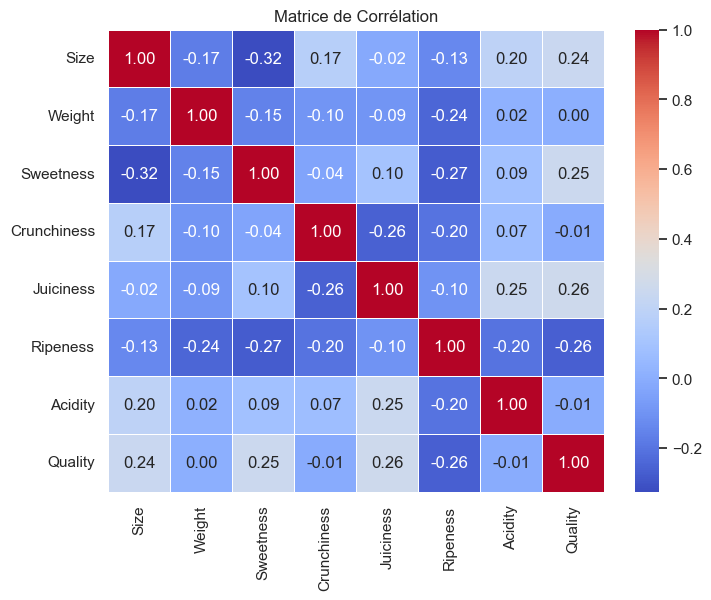

In [6]:
corr_matrix = df.corr()
sns.set(style='white') 
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()

# Question 4

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(columns = 'Quality')
y = df['Quality']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 30)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
coefficients = model.coef_
coefficients

array([ 0.11030139,  0.046009  ,  0.09882712,  0.00675947,  0.0761256 ,
       -0.02158213, -0.05187275])

In [11]:
for i in range(8):
    print(X.columns[i],coefficients[i])

Size 0.11030138612193782
Weight 0.04600899715509226
Sweetness 0.09882712494927927
Crunchiness 0.006759470149202609
Juiciness 0.07612560322327208
Ripeness -0.021582129580483035
Acidity -0.05187274897539839


IndexError: index 7 is out of bounds for axis 0 with size 7

**Il semblerait que la caractéristique la plus importante est la taille (Size) contrairement à ce que l'on pensait, l'acidité et la douceur influent également mais de facon moins importante que la taille. La douceur est le deuxième facteur le plus important. Nous tenons à ajouter qu'il est bizarre d'utiliser un modèle autre que de classification dans ce cas là...**

# Question 5

**Utilisons random forest**

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [13]:
model_randomForest = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 2, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}

grid_search = GridSearchCV(estimator=model_randomForest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, print(f"Meilleurs résultats : {best_params}")

Meilleurs résultats : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [14]:
random_forest_model = grid_search.best_estimator_
y_pred = random_forest_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8775


# Question 6

In [20]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [23]:
np.array(x_test.iloc[0].tolist())

array(['-3.193771996', '2.130105726', '-0.247501191', '-2.620954157',
       '4.226314433', '4.59034704', '1.529106684'], dtype='<U32')

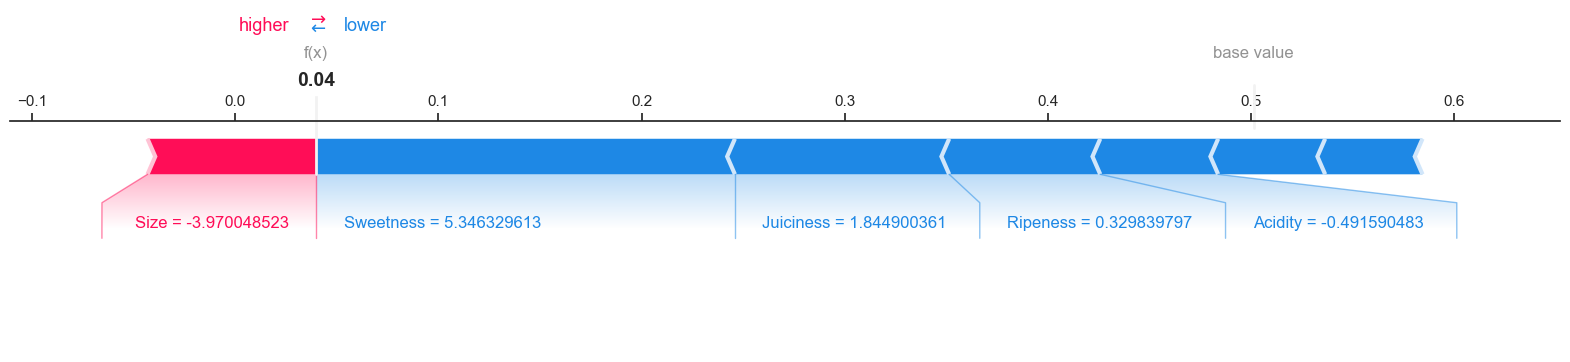

In [24]:
import shap

explainer = shap.TreeExplainer(random_forest_model)


observation = X.iloc[0]
shap_values = explainer.shap_values(observation)
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, feature_names=X.columns)


shap.plots.force(explainer.expected_value[0], shap_values[0], features=observation,matplotlib=True)



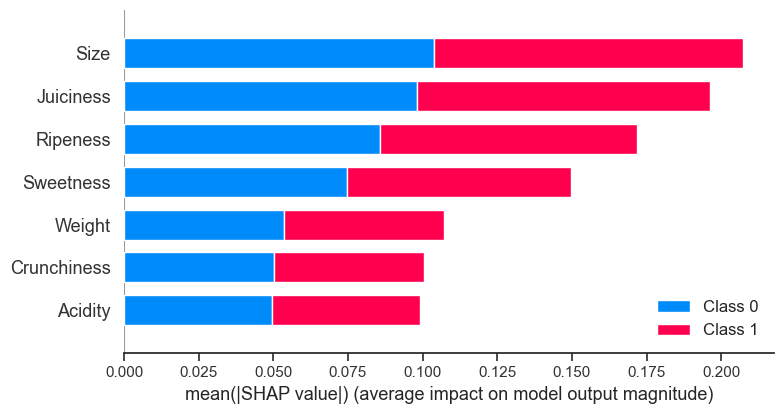

In [26]:
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

Nous constatons la même chose que pour la régression linéaire.

In [27]:
X1 = X.to_numpy()
X1

array([[-3.970048523, -2.512336381, 5.346329613, ..., 1.844900361,
        0.329839797, '-0.491590483'],
       [-1.195217191, -2.839256528, 3.664058758, ..., 0.853285795,
        0.867530082, '-0.722809367'],
       [-0.292023862, -1.351281995, -1.738429162, ..., 2.838635512,
        -0.038033328, '2.621636473'],
       ...,
       [-2.634515299, -2.13824672, -2.440461285, ..., 2.19970859,
        4.763859177, '-1.334611391'],
       [-4.008003744, -1.779337107, 2.366396966, ..., 2.161435121,
        0.214488384, '-2.229719806'],
       [0.27853965, -1.715505028, 0.121217251, ..., 1.2666774,
        -0.77657147, '1.599796456']], dtype=object)

ExactExplainer explainer: 4001it [1:29:20,  1.35s/it]                                                                  


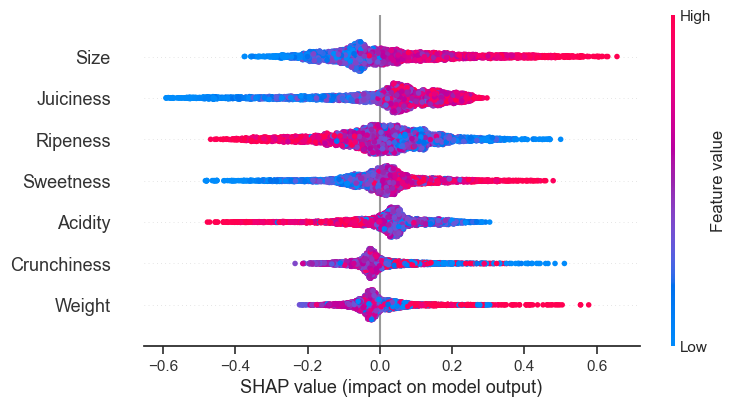

In [28]:
X["Acidity"] = X["Acidity"].astype(float)

explainer = shap.Explainer(random_forest_model.predict,X)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)

In [30]:
shap.dependence_plot(0, shap_values[0], X)

IndexError: index 7 is out of bounds for axis 0 with size 7

In [31]:
X["Acidity"].isnull().any()

False

In [32]:
X.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
dtype: object

• Use dependance plots in order to understand the behaviour of the most important variables

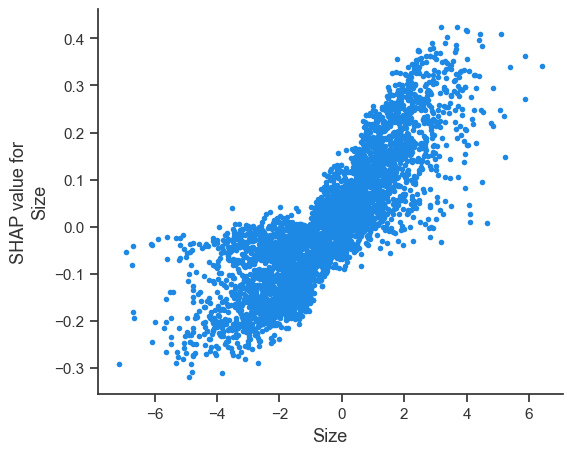

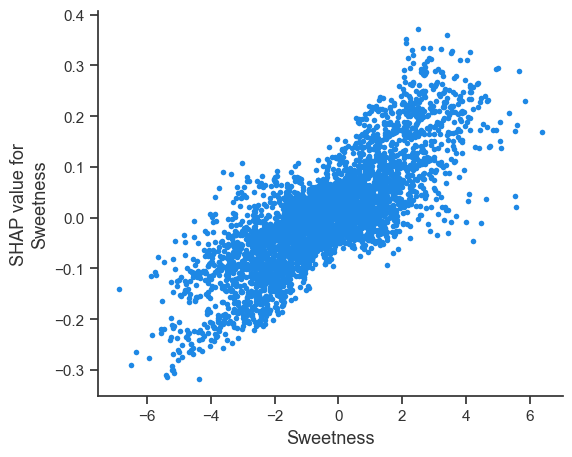

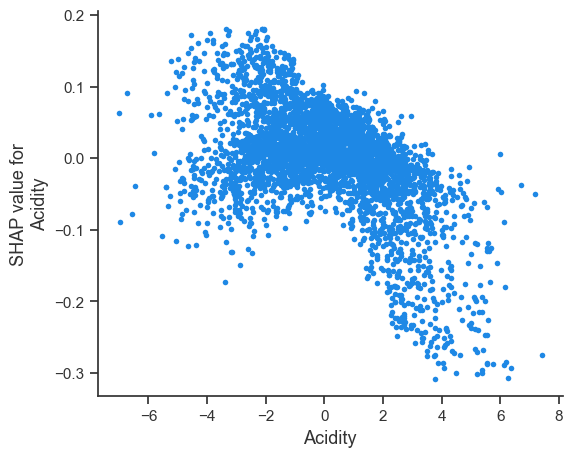

In [33]:
coucou = shap.TreeExplainer(random_forest_model)
val = coucou.shap_values(X)
shap.dependence_plot("Size", val[1], X, interaction_index=None, show=False)
shap.dependence_plot("Sweetness", val[1], X, interaction_index=None, show=False)
shap.dependence_plot("Acidity", val[1], X, interaction_index=None, show=False)
plt.show()

# Question 7

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

• Let’s reduce the dimension of our data for visualisation purposes. Do a PCA with the shapley values
and visualise the 2 principal axis.

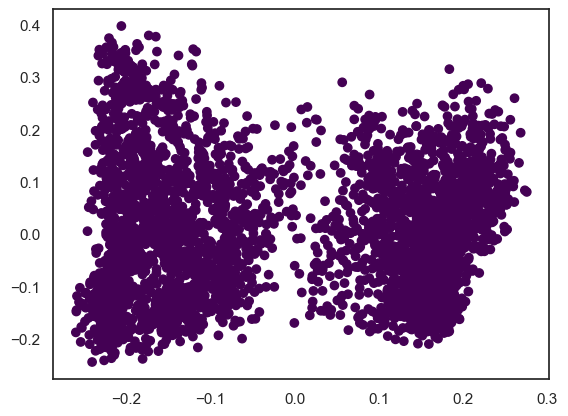

In [56]:
val_2 = val[1]  # Classe "good"
pca = PCA(n_components=2)
val_pca = pca.fit_transform(val_2)

# Visu
plt.scatter(val_pca[:, 0], val_pca[:, 1], c=clusters, cmap='viridis')
plt.show()

• Given the visualisation choose a clustering algorithm (K-Means, DBSCAN, gausian mixture...) and
try to cluster the shapley values of the property.

In [54]:
from sklearn.cluster import DBSCAN

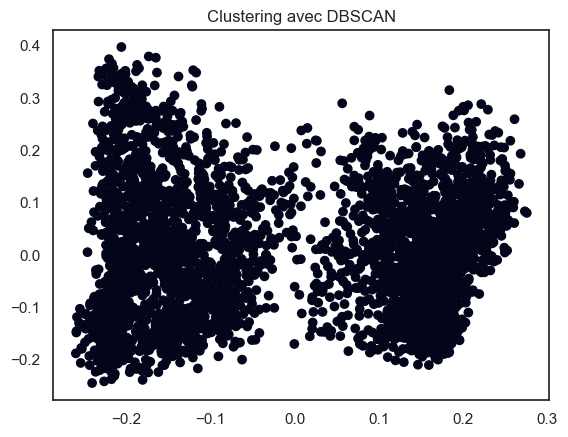

In [60]:
dbscan = DBSCAN(eps=0.5, min_samples=5) 
clusters = dbscan.fit_predict(val_pca)
plt.scatter(val_pca[:, 0], val_pca[:, 1], c=clusters)
plt.title('Clustering avec DBSCAN')
plt.show()

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


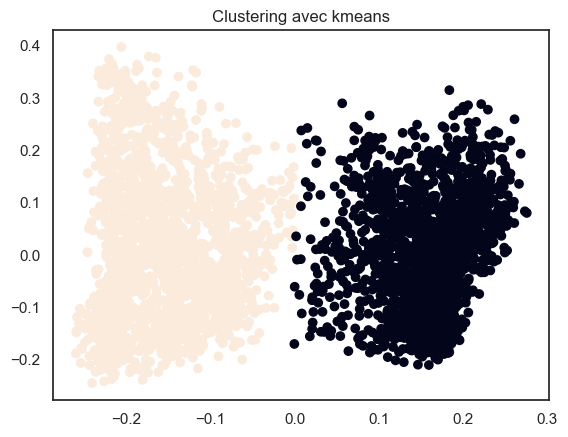

In [59]:
from sklearn.cluster import KMeans

# On ne distingue pas 2 clusters avec DBSCAN donc on fait KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(val_pca)
clusters = kmeans.predict(val_pca)

# Visu
plt.scatter(val_pca[:, 0], val_pca[:, 1], c=clusters)
plt.title('Clustering avec kmeans')
plt.show()
